# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"


record = 0
sets = 1

# Data Frame
weather_df = pd.DataFrame({"City": cities})

weather_df["Date"] = ""
weather_df["Country"] = ""      
weather_df["Longitude"] = ""
weather_df["Latitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Begin Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"] 
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Temperature (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
   
    except:
            print(f"City not found{city}.")
            #print (query_url) 
        
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Retrieval Complete")
print("-----------------------------")

Begin Retrieval
-----------------------------
Processing Record 0  of Set 1 | punta arenas.
Processing Record 1  of Set 1 | hermanus.
Processing Record 2  of Set 1 | lazurne.
Processing Record 3  of Set 1 | atuona.
Processing Record 4  of Set 1 | launceston.
Processing Record 5  of Set 1 | rikitea.
Processing Record 6  of Set 1 | cape town.
Processing Record 7  of Set 1 | belushya guba.
City not foundbelushya guba.
Processing Record 8  of Set 1 | illoqqortoormiut.
City not foundilloqqortoormiut.
Processing Record 9  of Set 1 | ushuaia.
Processing Record 10  of Set 1 | jamestown.
Processing Record 11  of Set 1 | busselton.
Processing Record 12  of Set 1 | hilo.
Processing Record 13  of Set 1 | warqla.
City not foundwarqla.
Processing Record 14  of Set 1 | harnosand.
Processing Record 15  of Set 1 | hofn.
Processing Record 16  of Set 1 | guerrero negro.
Processing Record 17  of Set 1 | bredasdorp.
Processing Record 18  of Set 1 | vila franca do campo.
Processing Record 19  of Set 1 | alb

Processing Record 27  of Set 4 | linqiong.
Processing Record 28  of Set 4 | namatanai.
Processing Record 29  of Set 4 | sangar.
Processing Record 30  of Set 4 | longyearbyen.
Processing Record 31  of Set 4 | rawson.
Processing Record 32  of Set 4 | cravo norte.
Processing Record 33  of Set 4 | cherskiy.
Processing Record 34  of Set 4 | santa marta.
Processing Record 35  of Set 4 | siyabuswa.
Processing Record 36  of Set 4 | havoysund.
Processing Record 37  of Set 4 | columbus.
Processing Record 38  of Set 4 | bilibino.
Processing Record 39  of Set 4 | ixtapa.
Processing Record 40  of Set 4 | asau.
Processing Record 41  of Set 4 | xuanhua.
Processing Record 42  of Set 4 | dourbali.
Processing Record 43  of Set 4 | nautla.
Processing Record 44  of Set 4 | east london.
Processing Record 45  of Set 4 | pevek.
Processing Record 46  of Set 4 | yeppoon.
Processing Record 47  of Set 4 | fairbanks.
Processing Record 48  of Set 4 | ketchikan.
Processing Record 49  of Set 4 | orlik.
Processing Re

Processing Record 10  of Set 8 | boissevain.
Processing Record 11  of Set 8 | floro.
Processing Record 12  of Set 8 | carutapera.
Processing Record 13  of Set 8 | gizo.
Processing Record 14  of Set 8 | lieksa.
Processing Record 15  of Set 8 | asuncion.
Processing Record 16  of Set 8 | razole.
Processing Record 17  of Set 8 | dzhebariki-khaya.
Processing Record 18  of Set 8 | senanga.
Processing Record 19  of Set 8 | visby.
Processing Record 20  of Set 8 | lobau.
Processing Record 21  of Set 8 | bojnurd.
Processing Record 22  of Set 8 | port macquarie.
Processing Record 23  of Set 8 | flinders.
Processing Record 24  of Set 8 | lorengau.
Processing Record 25  of Set 8 | muroto.
Processing Record 26  of Set 8 | jiddah.
City not foundjiddah.
Processing Record 27  of Set 8 | husavik.
Processing Record 28  of Set 8 | tandil.
Processing Record 29  of Set 8 | kawalu.
Processing Record 30  of Set 8 | berdigestyakh.
Processing Record 31  of Set 8 | marienburg.
Processing Record 32  of Set 8 | wi

Processing Record 40  of Set 11 | hovd.
Processing Record 41  of Set 11 | iskateley.
Processing Record 42  of Set 11 | nicoya.
Processing Record 43  of Set 11 | bagotville.
Processing Record 44  of Set 11 | okhotsk.
Processing Record 45  of Set 11 | borger.
Processing Record 46  of Set 11 | isawa.
Processing Record 47  of Set 11 | kangaatsiaq.
Processing Record 48  of Set 11 | luangwa.
Processing Record 49  of Set 11 | nalut.
Processing Record 0  of Set 12 | whitehorse.
Processing Record 1  of Set 12 | andenes.
Processing Record 2  of Set 12 | sandusky.
Processing Record 3  of Set 12 | bien hoa.
Processing Record 4  of Set 12 | arlit.
Processing Record 5  of Set 12 | puerto escondido.
Processing Record 6  of Set 12 | natitingou.
Processing Record 7  of Set 12 | isla mujeres.
Processing Record 8  of Set 12 | dwarka.
Processing Record 9  of Set 12 | seoul.
Processing Record 10  of Set 12 | zhoucheng.
Processing Record 11  of Set 12 | acarau.
Processing Record 12  of Set 12 | skelleftea.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
weather_df.count()

City                592
Date                592
Country             592
Longitude           592
Latitude            592
Cloudiness (%)      592
Humidity (%)        592
Temperature (F)     592
Wind Speed (mph)    592
Humidity(%)         539
Temperature(F)      539
dtype: int64

In [43]:
weather_df.head()

,City,Date,Country,Longitude,Latitude,Cloudiness (%),Humidity (%),Temperature (F),Wind Speed (mph)
0,punta arenas,2021-04-17 22:22:54,CL,-70.9167,-53.15,75,81,46.67,2.06
1,hermanus,2021-04-17 22:22:55,ZA,19.2345,-34.4187,0,22,72.266,3.67
2,lazurne,2021-04-17 22:22:55,UA,32.5295,46.084,99,100,43.268,0.89
3,atuona,2021-04-17 22:26:50,PF,-139.033,-9.8,36,74,81.014,8.47
4,launceston,2021-04-17 22:31:34,AU,147.167,-41.45,27,55,65.264,7.72


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [40]:
# None of the cities in my data exceeded had humidity of 100 or more

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Temperature (04/17/21)')

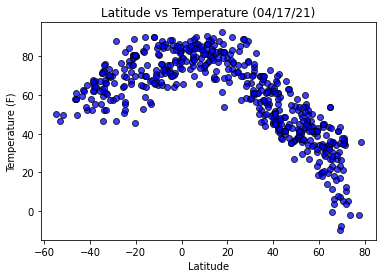

In [44]:

today = time.strftime("%m/%d/%y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Temperature (F)"]).astype(float), 
facecolors="blue", edgecolors="black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs Temperature ({today})")

#Temp will decrease the further away you get from the equator

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs Humidity (%) (04/17/2021)')

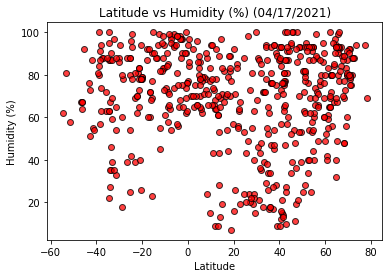

In [49]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), 
pd.to_numeric(weather_df["Humidity (%)"]).astype(float), 
facecolors="red", edgecolors="black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity (%) ({today})")

#The graph is all over the place I cant tell any patterns

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs Cloudiness (04/17/2021)')

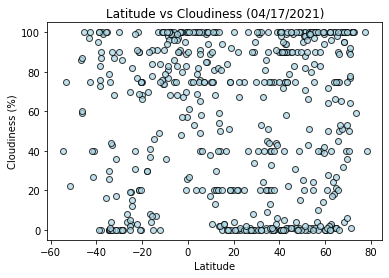

In [52]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), 
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), 
facecolors="lightblue", edgecolors="black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness ({today})")

# Based on the graph cloudiness isnt coerrelated to latitude

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs Wind Speed (04/17/2021)')

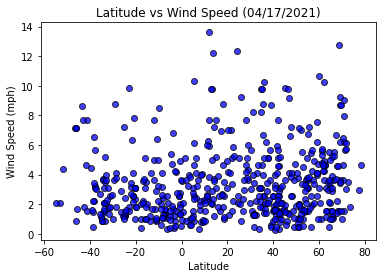

In [53]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), 
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), 
facecolors="blue", edgecolors="black", alpha = 0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed ({today})")

# Latitude and wind speed are not coerrelated

## Linear Regression

In [55]:
Northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
Southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.95x + 92.01
The r-squared is: -0.8896686265285022


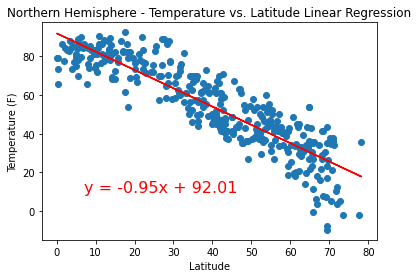

In [59]:
x_values = pd.to_numeric(Northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(Northern_df['Temperature (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

#As latitude increases temperature decreases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 80.28
The r-squared is: 0.6068497446849231


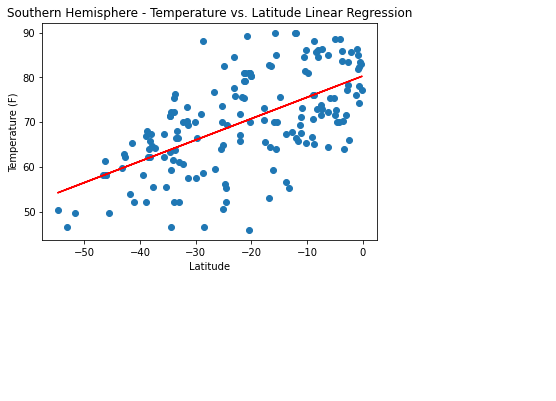

In [60]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()
#As latitude increases Temperature increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 59.77
The r-squared is: 0.1519366795003264


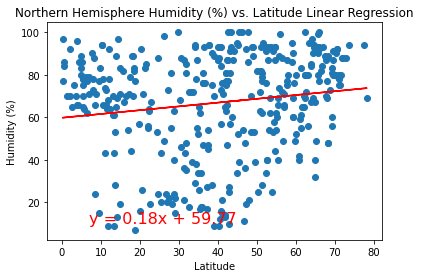

In [66]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

plt.show()

#I dont see a correlation between Humidity and Latitude

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.32x + 81.54
The r-squared is: 0.23283132867159972


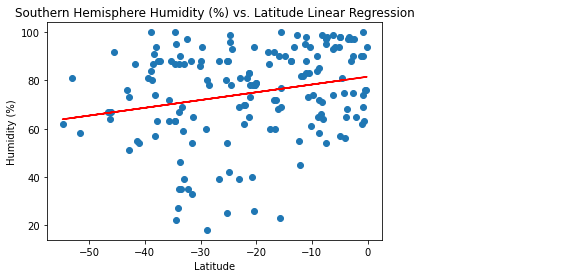

In [63]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()
#No correlation between southern hemisphere and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 50.86
The r-squared is: 0.04738865726423036


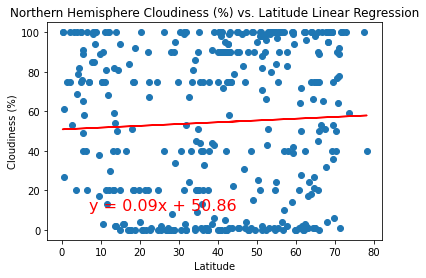

In [69]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
#No correlation in northern hemisphere cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.83x + 77.14
The r-squared is: 0.30627678959299875


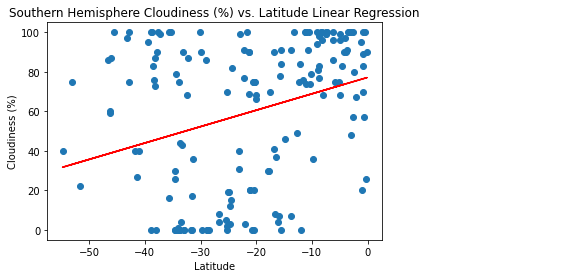

In [68]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(7,10),fontsize=16,color="red")
print(f"The r-squared is: {rvalue}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression')


plt.show()

#No correlation in southern hemisphere cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.35
The r-squared is: 0.04269149969812361


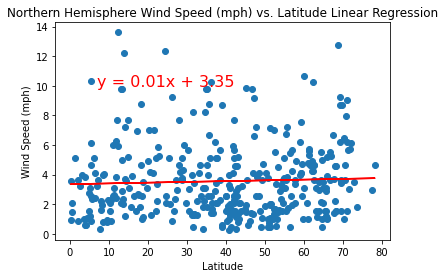

In [71]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
print(f"The r-squared is: {rvalue}")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression')


plt.show()
#No correlation in Northern wind speed and latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 2.19
The r-squared is: -0.1969263079720202


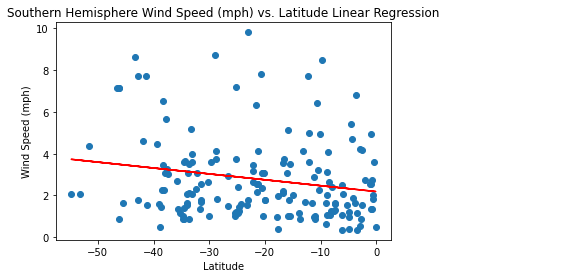

In [72]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude Linear Regression')


plt.show()
#Southern wind speeds look a little slower as latitude increases